### Sentiment analysis comparison with different vectorization techniques

**Author: Abhishek Dey**


**Problem Statement:** Considering Naive Bias classifier, compare the performance with BOW, N-Gram and TDF vectorization techniques on sentiment analysis task

### Import Libraries

In [22]:
# text preprocessing

from textacy import preprocessing as tp
import emoji
import contractions
import string

# tokenization & stop words

import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# BOW, N-gram, TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Naive Bias Classifier

from sklearn.naive_bayes import MultinomialNB

# Train - Test split

from sklearn.model_selection import train_test_split

# Scoring Metric

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matplotlib

import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /home/abhishek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/abhishek/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abhishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load data

In [2]:
data=pd.read_csv('datasets/chat_dataset.csv')

data.head()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative


In [3]:
data.shape

(584, 2)

In [4]:
x=list(data['message'])
y=list(data['sentiment'])

In [5]:
x[0:5]

['I really enjoyed the movie',
 'The food was terrible',
 "I'm not sure how I feel about this",
 'The service was excellent',
 'I had a bad experience']

In [6]:
y[0:5]

['positive', 'negative', 'neutral', 'positive', 'negative']

### Text preprocessing

In [7]:
def text_preprocess(text):
    
    
    text = tp.remove.html_tags(text)
    text = tp.replace.urls(text,'')
    text = tp.replace.currency_symbols(text,'')
    text = tp.replace.emails(text,'')
    text = tp.replace.phone_numbers(text,'*')
    text = tp.replace.hashtags(text,'')
    text = tp.replace.numbers(text,'*')
    text = text.translate(str.maketrans("","",string.punctuation))
    text = emoji.replace_emoji(text,'')
    text = contractions.fix(text)
    text = text.lower()
    text = tp.normalize.whitespace(text)

    
    return text

In [8]:
x_filtered = [text_preprocess(sentence) for sentence in x]

In [9]:
x[0:5]

['I really enjoyed the movie',
 'The food was terrible',
 "I'm not sure how I feel about this",
 'The service was excellent',
 'I had a bad experience']

In [10]:
x_filtered[0:5]

['i really enjoyed the movie',
 'the food was terrible',
 'i am not sure how i feel about this',
 'the service was excellent',
 'i had a bad experience']

### Tokenization

In [11]:
x_tokenized = [word_tokenize(sentence) for sentence in x_filtered]

In [12]:
x_tokenized[0:5]

[['i', 'really', 'enjoyed', 'the', 'movie'],
 ['the', 'food', 'was', 'terrible'],
 ['i', 'am', 'not', 'sure', 'how', 'i', 'feel', 'about', 'this'],
 ['the', 'service', 'was', 'excellent'],
 ['i', 'had', 'a', 'bad', 'experience']]

### Train Test split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_filtered,y, test_size=0.2, random_state=42)

In [14]:
x_train[0:5]

['the book was amazing',
 'i am loving this new hobby i picked up',
 'the hike was average',
 'this movie was average',
 'i had the best vacation ever']

In [15]:
x_test[0:5]

['i am just taking it one day at a time',
 'i am feeling so happy today',
 'the beach was peaceful',
 'i love seeing my friends and catching up with them',
 'i just got into a car accident and my car is totaled']

In [16]:
y_train[0:5]

['positive', 'positive', 'neutral', 'neutral', 'positive']

In [17]:
y_test[0:5]

['neutral', 'positive', 'positive', 'positive', 'negative']

In [18]:
len(x_train), len(y_train), len(x_test), len(y_test)

(467, 467, 117, 117)

## Bag of words

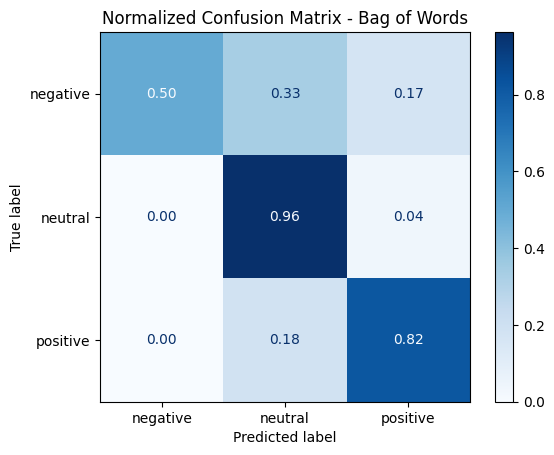

In [29]:

results = {}

# BOW vectorizer

bow_vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
x_train_bow = bow_vectorizer.fit_transform(x_train)
x_test_bow = bow_vectorizer.transform(x_test)

# Naive Bias Classifier

clf_bow = MultinomialNB()
clf_bow.fit(x_train_bow, y_train)
pred_bow = clf_bow.predict(x_test_bow)


# Accuracy

results["Bag of Words"] = accuracy_score(y_test, pred_bow)

# Normalized Confusion Matrix
cm_bow = confusion_matrix(y_test, pred_bow, normalize='true')  # Normalize by true labels (rows)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bow, display_labels=clf_bow.classes_)

# Plot
disp.plot(cmap='Blues', values_format=".2f")  # Format values to 2 decimals
plt.title("Normalized Confusion Matrix - Bag of Words")
plt.show()

In [30]:
results["Bag of Words"]

0.8034188034188035

## N-gram (Unigram + bigram + trigram)

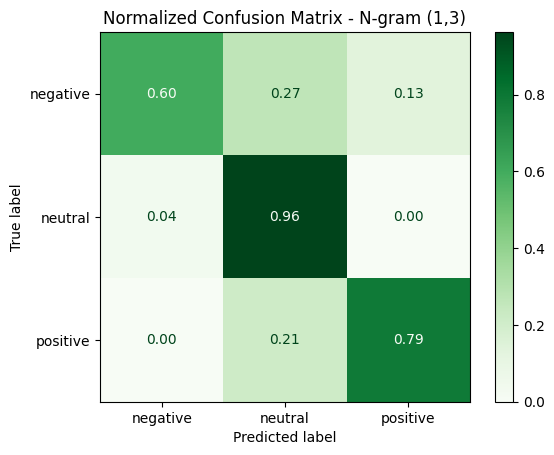

In [35]:
# N-gram Vectorizer (Unigram + Bigram + Trigram)

ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), token_pattern=r"(?u)\b\w+\b")
x_train_ngram = ngram_vectorizer.fit_transform(x_train)
x_test_ngram = ngram_vectorizer.transform(x_test)

# Naive Bayes Classifier
clf_ngram = MultinomialNB()
clf_ngram.fit(x_train_ngram, y_train)
pred_ngram = clf_ngram.predict(x_test_ngram)

# Accuracy
results["N-gram"] = accuracy_score(y_test, pred_ngram)

# Normalized Confusion Matrix
cm_ngram = confusion_matrix(y_test, pred_ngram, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ngram, display_labels=clf_ngram.classes_)

# Plot
disp.plot(cmap='Greens', values_format=".2f")
plt.title("Normalized Confusion Matrix - N-gram (1,3)")
plt.show()

In [36]:
results["N-gram"]

0.8205128205128205

## TF-IDF

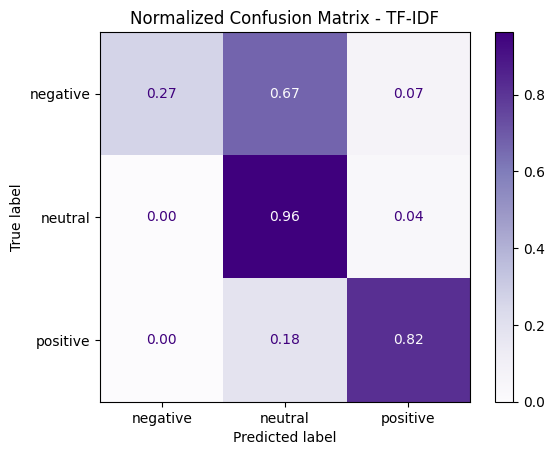

In [31]:

# TF-IDF Vectorizer

tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Naive Bayes Classifier

clf_tfidf = MultinomialNB()
clf_tfidf.fit(x_train_tfidf, y_train)
pred_tfidf = clf_tfidf.predict(x_test_tfidf)

# Accuracy

results["TF-IDF"] = accuracy_score(y_test, pred_tfidf)

# Normalized Confusion Matrix

cm_tfidf = confusion_matrix(y_test, pred_tfidf, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=clf_tfidf.classes_)

# Plot
disp.plot(cmap='Purples', values_format=".2f")
plt.title("Normalized Confusion Matrix - TF-IDF")
plt.show()

In [32]:
results["TF-IDF"]

0.7435897435897436

## Results comparison

In [37]:
print("Accuracy - Bag of words : ", results["Bag of Words"])
print("Accuracy - N-gram (1,3) : ", results["N-gram"])
print("Accuracy - Tf-IDF       : ", results["TF-IDF"])

Accuracy - Bag of words :  0.8034188034188035
Accuracy - N-gram (1,3) :  0.8205128205128205
Accuracy - Tf-IDF       :  0.7435897435897436
